In [1]:
import pandas as pd
import csv




df = pd.read_csv("UberDataset.csv", dtype=str)




In [2]:
df = df[~df['START_DATE'].str.contains("Total", na=False)]


In [3]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')


In [4]:


df['START_DATE'].dtype


dtype('<M8[ns]')

In [5]:
df['END_DATE'].dtype


dtype('<M8[ns]')

In [6]:
df['hour'] = df['START_DATE'].dt.hour
df['weekday'] = df['START_DATE'].dt.day_name()
df['month'] = df['START_DATE'].dt.month_name()
df['date'] = df['START_DATE'].dt.date



In [7]:
df[['START_DATE', 'hour', 'weekday', 'month']].head()


,START_DATE,hour,weekday,month
0,2016-01-01 21:11:00,21.0,Friday,January
1,2016-01-02 01:25:00,1.0,Saturday,January
2,2016-01-02 20:25:00,20.0,Saturday,January
3,2016-01-05 17:31:00,17.0,Tuesday,January
4,2016-01-06 14:42:00,14.0,Wednesday,January


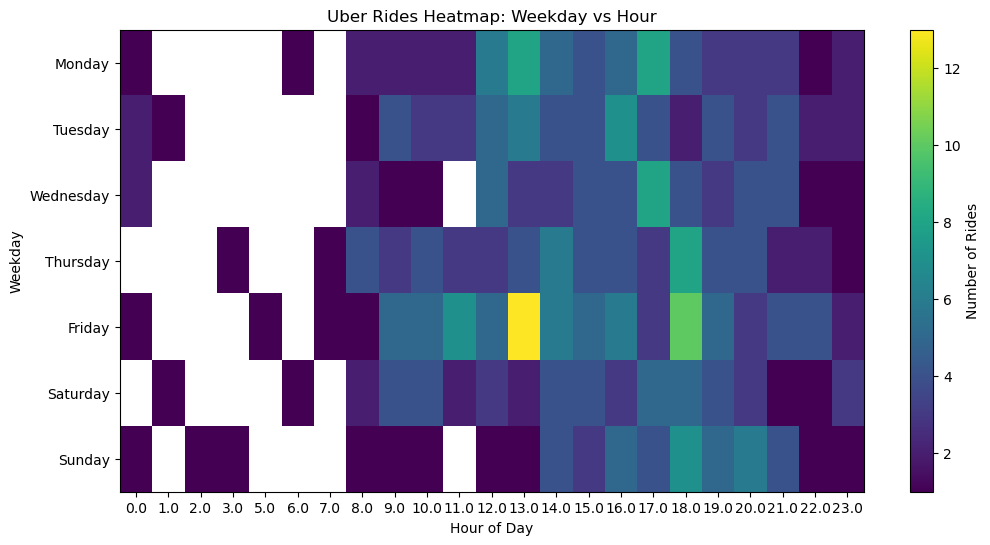

In [11]:
import matplotlib.pyplot as plt
import numpy as np
pivot = df.pivot_table(
    index='weekday',
    columns='hour',
    values='START_DATE',
    aggfunc='count'
)

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot = pivot.reindex(weekday_order)

plt.figure(figsize=(12, 6))
plt.imshow(pivot, aspect='auto')
plt.colorbar(label='Number of Rides')

plt.xticks(np.arange(len(pivot.columns)), pivot.columns)
plt.yticks(np.arange(len(pivot.index)), pivot.index)

plt.title("Uber Rides Heatmap: Weekday vs Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")

plt.show()

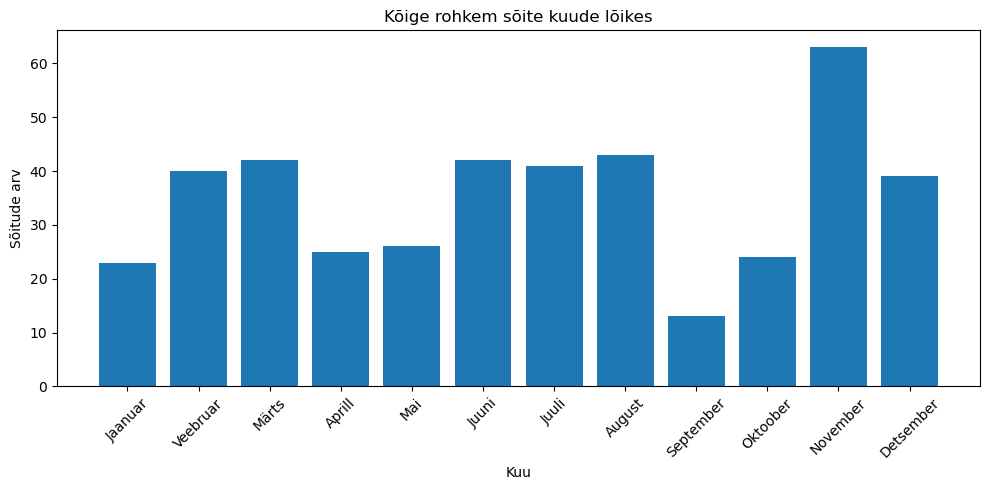

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("UberDataset.csv")

date_col = None
for col in df.columns:
    if "date" in col.lower() or "time" in col.lower() or "datetime" in col.lower():
        date_col = col
        break

if date_col is None:
    raise ValueError("Dataset ei sisalda kuupäeva või aja veergu!")

df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

kuud = {
    1: "Jaanuar", 2: "Veebruar", 3: "Märts", 4: "Aprill",
    5: "Mai", 6: "Juuni", 7: "Juuli", 8: "August",
    9: "September", 10: "Oktoober", 11: "November", 12: "Detsember"
}

df["Month"] = df[date_col].dt.month
df["Kuu_nimi"] = df["Month"].map(kuud)

month_counts = df["Kuu_nimi"].value_counts().reindex(kuud.values(), fill_value=0)

plt.figure(figsize=(10, 5))
plt.bar(month_counts.index, month_counts.values)
plt.xlabel("Kuu")
plt.ylabel("Sõitude arv")
plt.title("Kõige rohkem sõite kuude lõikes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


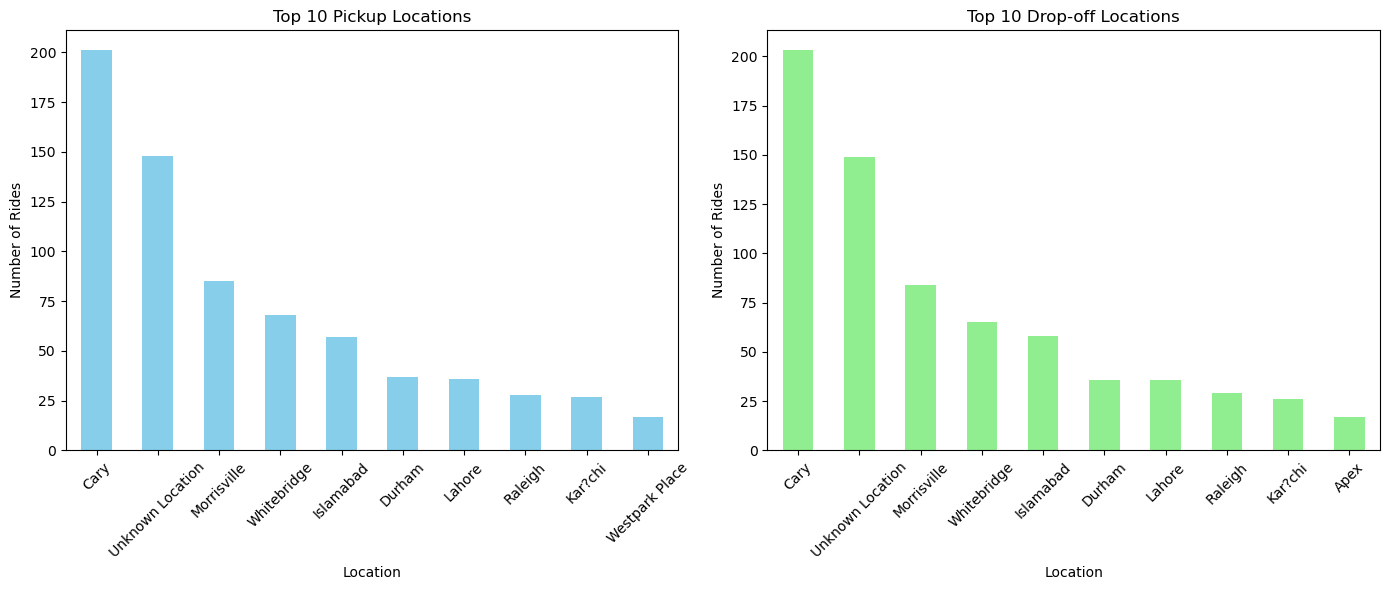

In [12]:

# Count top 10 locations
top_start = df['START'].value_counts().head(10)
top_stop = df['STOP'].value_counts().head(10)

# Create side-by-side plots
plt.figure(figsize=(14,6))

# LEFT: pickup locations
plt.subplot(1, 2, 1)
top_start.plot(kind='bar', color='skyblue')
plt.title("Top 10 Pickup Locations")
plt.xlabel("Location")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)

# RIGHT: dropoff locations
plt.subplot(1, 2, 2)
top_stop.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Drop-off Locations")
plt.xlabel("Location")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

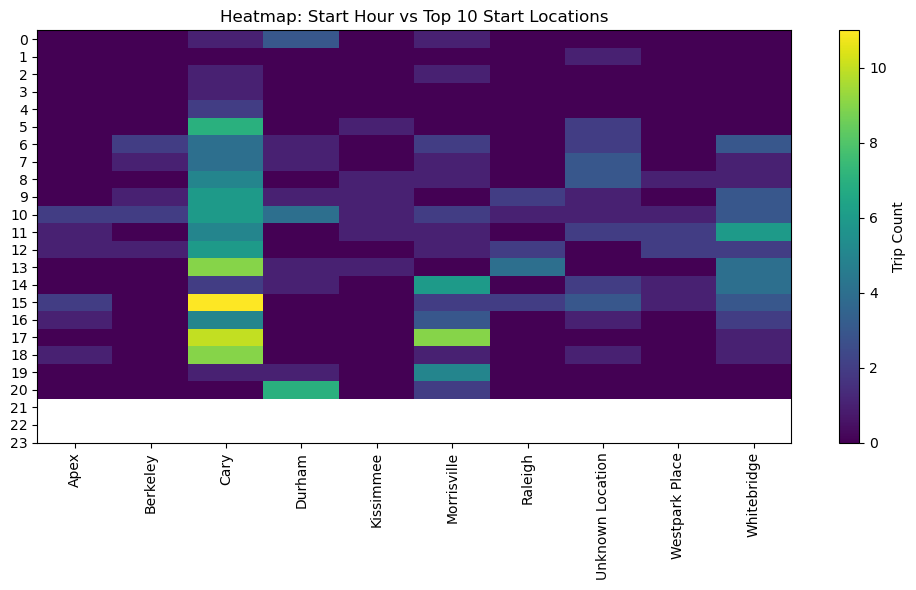

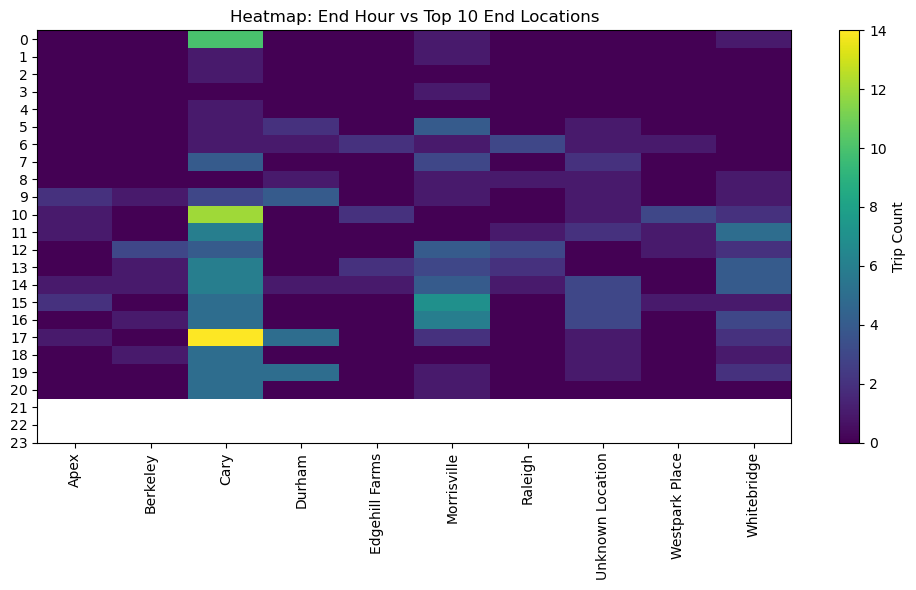

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('UberDataset.csv')

df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

df = df.dropna(subset=['START_DATE', 'END_DATE'])

df['start_hour'] = df['START_DATE'].dt.hour
df['end_hour'] = df['END_DATE'].dt.hour

top_start = df['START'].value_counts().head(10).index
top_stop = df['STOP'].value_counts().head(10).index

df_start = df[df['START'].isin(top_start)]
df_stop = df[df['STOP'].isin(top_stop)]

start_pivot = df_start.pivot_table(
    index='start_hour',
    columns='START',
    aggfunc='size',
    fill_value=0
)

end_pivot = df_stop.pivot_table(
    index='end_hour',
    columns='STOP',
    aggfunc='size',
    fill_value=0
)

cmap = "plasma"

plt.figure(figsize=(10, 6))
plt.imshow(start_pivot, aspect='auto', cmap=cmap)
plt.xticks(range(len(start_pivot.columns)), start_pivot.columns, rotation=90)
plt.yticks(range(24), range(24))
plt.title("Heatmap: Start Hour vs Top 10 Start Locations")
plt.colorbar(label="Trip Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(end_pivot, aspect='auto', cmap)
plt.xticks(range(len(end_pivot.columns)), end_pivot.columns, rotation=90)
plt.yticks(range(24), range(24))
plt.title("Heatmap: End Hour vs Top 10 End Locations")
plt.colorbar(label="Trip Count")
plt.tight_layout()
plt.show()
